In [159]:
import cv2

In [451]:
import requests

# https://gcis.nat.gov.tw/pub/cmpy/cmpyInfoListAction.do
http_proxy  = "http://proxy.xxx.com:8080/"
https_proxy = "http://proxy.xxx.com:8080/"
proxyDict = { 
    "http":http_proxy, 
    "https":https_proxy              
}

rs = requests.session()
with open('kaptcha.jpg', 'wb') as f:    
    res = rs.get('https://gcis.nat.gov.tw/pub/kaptcha.jpg', stream=True, verify=False, proxies=proxyDict)
    f.write(res.content)

C:\Users\terrencechen\AppData\Local\conda\conda\envs\python35\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


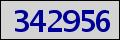

In [452]:
import IPython.display
IPython.display.Image('kaptcha.jpg')

# from IPython.display import Image
# Image('check.png')

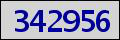

In [453]:
from PIL import Image #for python3 => conda install pillow instead of conda install PIL(python2)
image = Image.open('kaptcha.jpg')
image

In [454]:
import PIL
import numpy
pil_image = PIL.Image.open('kaptcha.jpg').convert('RGB') #把圖片轉為數字
open_cv_image = numpy.array(pil_image)

In [455]:
open_cv_image

array([[[  0,   0,   0],
        [ 10,  10,  10],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [ 10,  10,  10],
        [  0,   0,   0]],

       [[ 14,  14,  14],
        [188, 188, 188],
        [215, 215, 215],
        ...,
        [215, 215, 215],
        [188, 188, 188],
        [ 14,  14,  14]],

       [[  0,   0,   0],
        [217, 217, 217],
        [223, 223, 223],
        ...,
        [223, 223, 223],
        [217, 217, 217],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [217, 217, 217],
        [223, 223, 223],
        ...,
        [223, 223, 223],
        [217, 217, 217],
        [  0,   0,   0]],

       [[ 14,  14,  14],
        [188, 188, 188],
        [215, 215, 215],
        ...,
        [215, 215, 215],
        [188, 188, 188],
        [ 14,  14,  14]],

       [[  0,   0,   0],
        [ 10,  10,  10],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [ 10,  10,  10],
        [  0,   0,   0]]

Populating the interactive namespace from numpy and matplotlib


C:\Users\terrencechen\AppData\Local\conda\conda\envs\python35\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


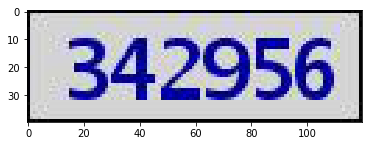

In [456]:
%pylab inline
from matplotlib import pyplot as plt
plt.imshow(open_cv_image) #把數字轉成圖片

In [457]:
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY) #轉成灰階
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #找出輪廓

In [458]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])

In [459]:
ary = []
for (c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    print((x,y,w,h))
    if w >= 14 and h == 24: #抓六個數字,高度一樣,所以h == 24
        ary.append((x,y,w,h) )

(1, 1, 118, 38)
(14, 9, 16, 24)
(29, 9, 18, 24)
(33, 15, 6, 8)
(47, 9, 16, 24)
(62, 9, 19, 24)
(67, 13, 9, 8)
(81, 9, 15, 24)
(95, 9, 16, 24)
(100, 21, 6, 8)


In [460]:
print(ary)

[(14, 9, 16, 24), (29, 9, 18, 24), (47, 9, 16, 24), (62, 9, 19, 24), (81, 9, 15, 24), (95, 9, 16, 24)]


Populating the interactive namespace from numpy and matplotlib


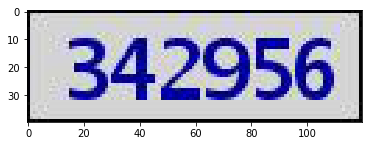

In [461]:
%pylab inline
plt.imshow(open_cv_image)

In [462]:
ary

[(14, 9, 16, 24),
 (29, 9, 18, 24),
 (47, 9, 16, 24),
 (62, 9, 19, 24),
 (81, 9, 15, 24),
 (95, 9, 16, 24)]

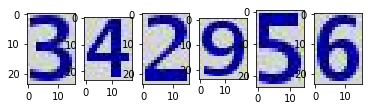

In [463]:
from matplotlib import pyplot as plt
fig = plt.figure()
for id, (x,y,w,h) in enumerate(ary):
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    plt.imshow(thresh)

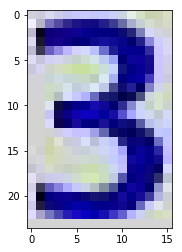

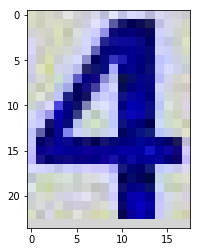

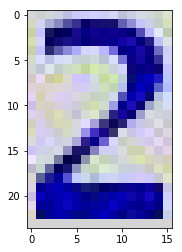

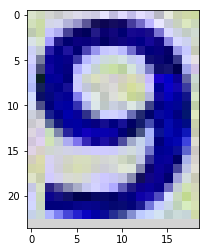

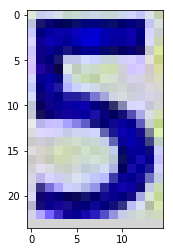

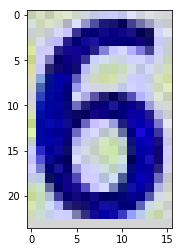

In [464]:
#多執行幾次以準備資料給電腦,從0~9,並將0~9各自放在各自的folder,自己手動建立0~9名稱的資料夾
from matplotlib import pyplot as plt
from datetime import datetime
ct = int(time.mktime(datetime.now().timetuple()))
for id, (x,y,w,h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig('{}_{}.jpg'.format(ct, id+1), dpi=100)

In [1]:
#產生訓練模型

import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier #利用分類器去建立模型, conda install scikit-learn

import numpy as np

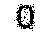

In [7]:
import PIL
import numpy

#600*400的圖餵給訓練模型速度會慢, 所以把圖片變小 => 50*33
basewidth = 50
pil_image = PIL.Image.open('0/1520580543_2.jpg').convert('1') #變成黑白 https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
wpercent = (basewidth/float(pil_image.size[0]))
hsize = int((float(pil_image.size[1])*float(wpercent)))
img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
img

Populating the interactive namespace from numpy and matplotlib


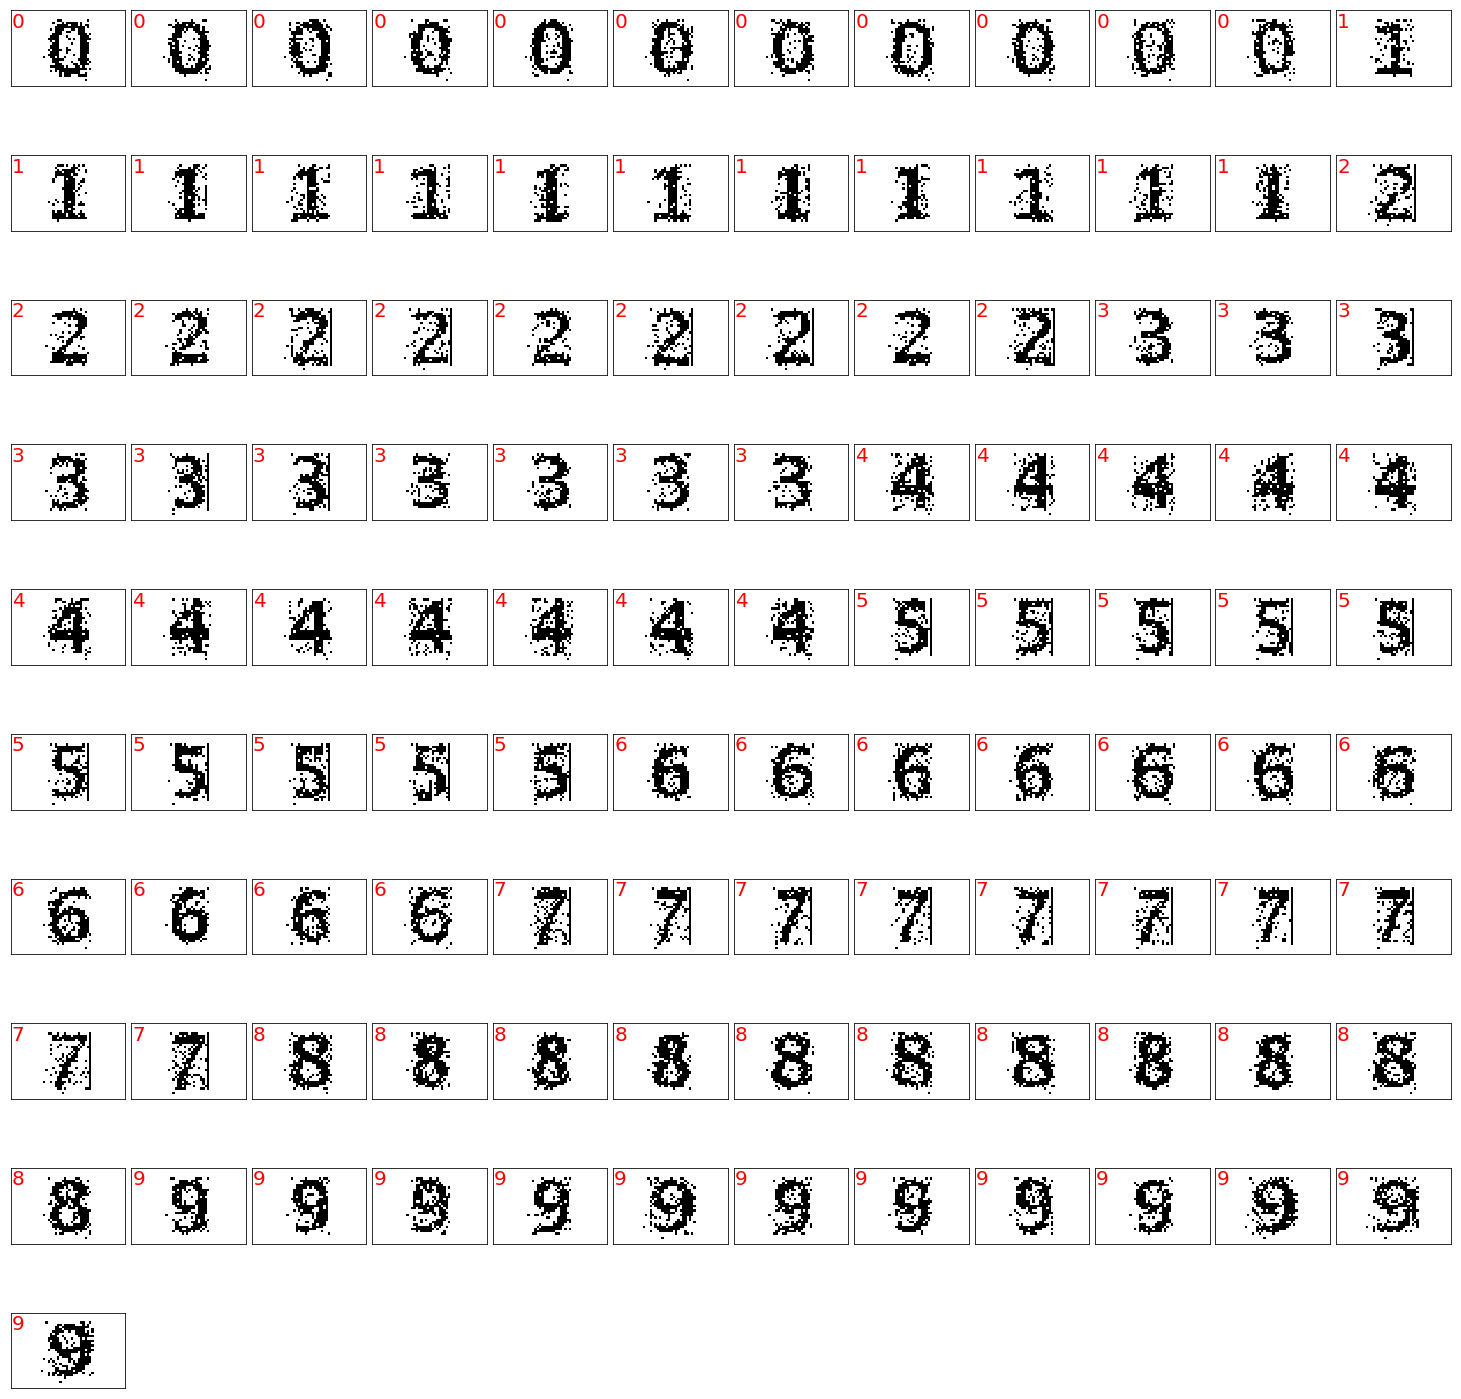

In [12]:
#把每張圖做RESIZE,並在圖上標示數字

%pylab inline
import os

#分類器:是一個監督式學習模型, 他會有兩個東西:一個是特徵一個是預測的目標
digits = [] #訓練的特徵
labels = [] #分類目標的答案, 都是0的就放0, 都是1的就放1,...
basewidth = 50
fig = plt.figure(figsize = (20,20))
cnt = 0 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(0,10):
    for img in os.listdir('{}/'.format(i)):
        pil_image = PIL.Image.open('{}/{}'.format(i, img)).convert('1') 
    
        wpercent = (basewidth/float(pil_image.size[0]))
        hsize = int((float(pil_image.size[1])*float(wpercent)))
        img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
        
        ax = fig.add_subplot(10, 12, cnt+1, xticks=[], yticks=[]) #在10*12=120個SIZE的圖上印出100多張圖
        ax.imshow(img,cmap=plt.cm.binary,interpolation='nearest')
        ax.text(0, 7, str(i), color="red", fontsize = 20) #在每張圖的Y軸畫上一個字
        cnt = cnt + 1
        
        digits.append([pixel for pixel in iter(img.getdata())])
        labels.append(i)

In [13]:
import numpy
digit_ary  = numpy.array(digits)

In [14]:
digit_ary.shape #在這個特徵集裡有多少的資料: 109個數字, 每個數字可以變成一個1650(50*33)長度的向量

(109, 1650)

In [16]:
from sklearn.preprocessing import StandardScaler #標準化在同一個尺度裡
scaler = StandardScaler()
scaler.fit(digit_ary)
X_scaled = scaler.transform(digit_ary)

C:\Users\terrencechen\AppData\Local\conda\conda\envs\python35\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='logistic', max_iter = 100) #max_iter越大越精準
mlp.fit(X_scaled,labels)

C:\Users\terrencechen\AppData\Local\conda\conda\envs\python35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [21]:
predicted = mlp.predict(X_scaled)

In [22]:
predicted

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [23]:
target = numpy.array(labels)

In [24]:
predicted == target

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='logistic', max_iter = 3000) #max_iter越大越精準
mlp.fit(X_scaled,labels)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [26]:
predicted = mlp.predict(X_scaled)

In [27]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [28]:
target = numpy.array(labels)

In [29]:
predicted == target

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Populating the interactive namespace from numpy and matplotlib


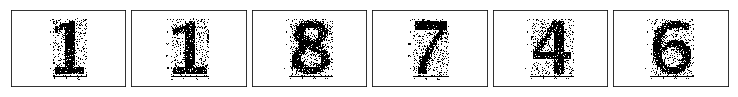

In [42]:
#驗證是否真的正確, 建一個資料夾(prediction)裡面放一些數字

%pylab inline
import os
import PIL

fig = plt.figure(figsize = (20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for idx, img in enumerate(os.listdir('prediction/')):
    pil_image = PIL.Image.open('prediction/{}'.format(img)).convert('1') 
    ax = fig.add_subplot(10, 12, idx+1, xticks=[], yticks=[])
    ax.imshow(pil_image,cmap=plt.cm.binary,interpolation='nearest')

In [43]:
%pylab inline
import os
data = []
basewidth = 50
fig = plt.figure(figsize = (20,20))
cnt = 0 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for idx, img in enumerate(os.listdir('prediction/')):
    pil_image = PIL.Image.open('prediction/{}'.format(img)).convert('1') 
    
    wpercent = (basewidth/float(pil_image.size[0]))
    hsize = int((float(pil_image.size[1])*float(wpercent)))
    img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
    data.append([pixel for pixel in iter(img.getdata())])

Populating the interactive namespace from numpy and matplotlib


<Figure size 1440x1440 with 0 Axes>

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)

In [45]:
mlp.predict(data_scaled)

array([1, 1, 8, 7, 4, 6])